In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fe6d65ab5b454c7f9a35be4889409e17 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eIEglteJBjHptUSZ0UEPO0vr8gsp4oGijMM6L2Y19WoQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_fe6d65ab5b454c7f9a35be4889409e17.get_object(Bucket='predictinglifeexpectancyusingmach-donotdelete-pr-mibaajxylrekhb',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set()

In [5]:
df = df_data_0
df.shape

(2938, 22)

In [6]:
df.isnull().sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean())

In [8]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.922493e+01,9.507640e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647964e+02,1.240803e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.094046e+01,2.258685e+01,1.00000,80.940461,8.700000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.832125e+01,1.992768e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


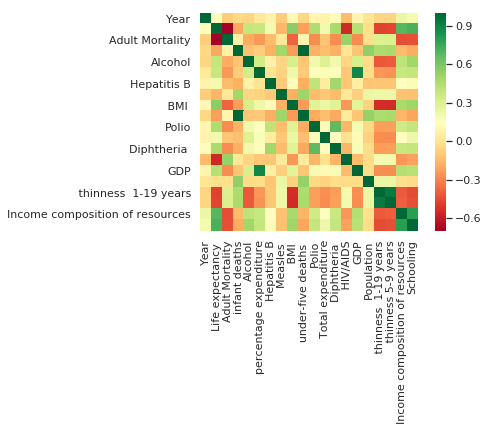

In [10]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [11]:
y = df["Life expectancy "]
x= df.drop(["Life expectancy ", "Country"], axis = 1)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
x["Status"] = labelencoder_X_1.fit_transform(x["Status"])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train,y_train)
cv_score= np.sqrt(-cross_val_score(rf,x_train,y_train, cv=10, scoring='neg_mean_squared_error'))
rmse = np.mean(cv_score)
print(rmse)

1.878059235090641


In [16]:
from sklearn import metrics
prediction = rf.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, prediction))

1.92662552242872

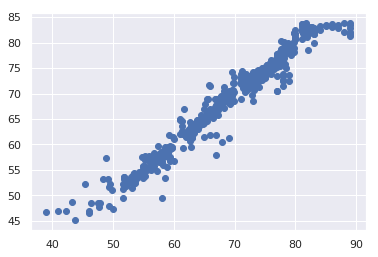

In [17]:
plt.scatter(y_test,prediction)

In [18]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-10 10:38:59,654 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [19]:
wml_credentials={
  "apikey": "H-RNjkb1RaqQvoVv8oqTR2zjHwklCIP7NiSKvg9f4MLo",
  "iam_apikey_description": "Auto-generated for key b0ba2aa4-8dba-455f-8ab3-557f2a797b5a",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/6b574c63848c4851bd1b766007f27d30::serviceid:ServiceId-6b8fed23-9fb3-4432-aa84-e046ab2188de",
  "instance_id": "a3aafd18-3624-48d0-a55c-462220b47a76",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [20]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [21]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "aditi", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "aditigadewar00617@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life_Prediction"}

In [22]:
model_artifact =client.repository.store_model(rf, meta_props=model_props)

In [23]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [24]:
published_model_uid

'c0f5abe9-1c7f-4a5e-8b76-7092b5c30bb5'

In [25]:
deployment = client.deployments.create(published_model_uid, name="Life_Prediction")



#######################################################################################

Synchronous deployment creation for uid: 'c0f5abe9-1c7f-4a5e-8b76-7092b5c30bb5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='7db7fd98-501a-4034-ab51-b0b997c237e2'
------------------------------------------------------------------------------------------------




In [26]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [27]:
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/a3aafd18-3624-48d0-a55c-462220b47a76/deployments/7db7fd98-501a-4034-ab51-b0b997c237e2/online'